In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('E://iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = data.drop(['species'], axis= 1)
y = data['species']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

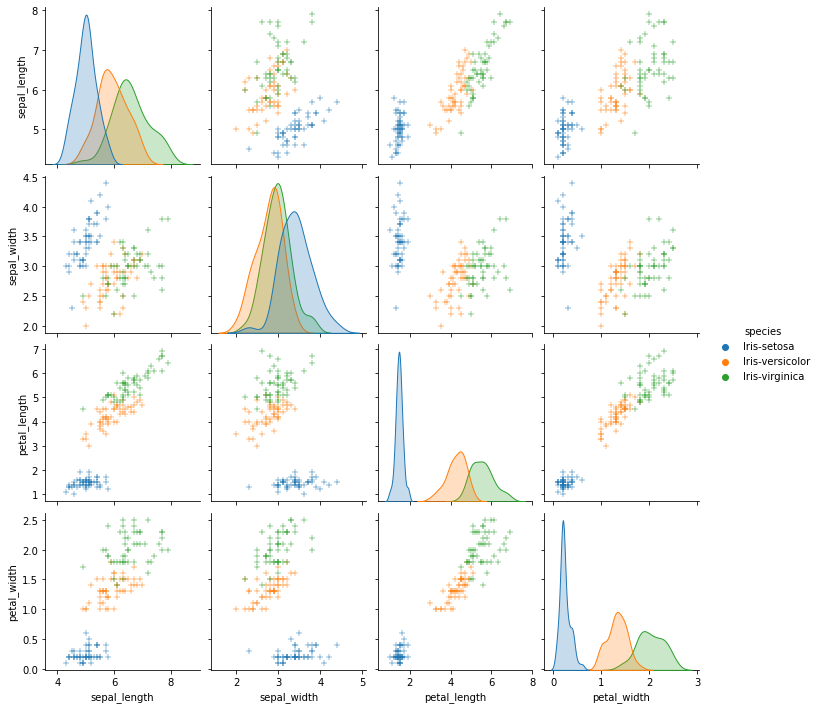

In [9]:
sns.pairplot(data, hue= 'species', markers= '+')
plt.show()

<AxesSubplot:>

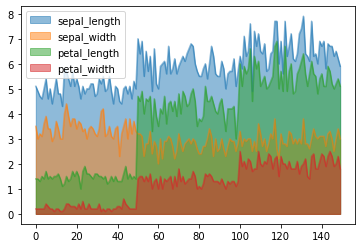

In [10]:
data.plot.area(stacked = False)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

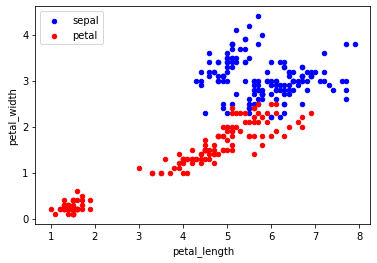

In [11]:
ax = data.plot.scatter(x = 'sepal_length', y = 'sepal_width', color = 'Blue', label= 'sepal')
data.plot.scatter(x = 'petal_length', y = 'petal_width', color = 'red', label= 'petal', ax= ax)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

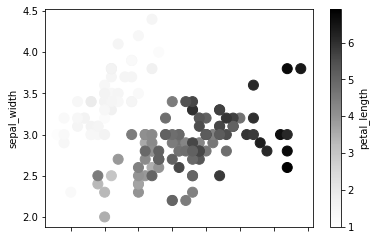

In [12]:
data.plot.scatter(x = 'sepal_length', y = 'sepal_width', c = 'petal_length', s = 100)

In [13]:
data_avg = data['sepal_width'].groupby(data['species']).mean()
data_avg

species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal_width, dtype: float64

<AxesSubplot:ylabel='sepal_width'>

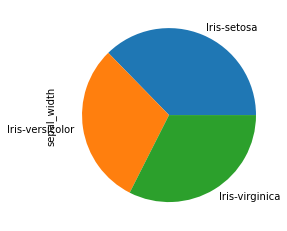

In [14]:
data_avg.plot.pie()

array([<AxesSubplot:ylabel='petal_length'>,
       <AxesSubplot:ylabel='petal_width'>], dtype=object)

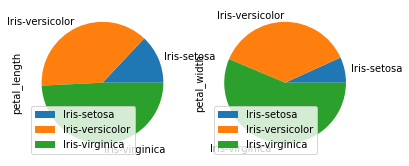

In [15]:
data_avg2 = data[['petal_length', 'petal_width']].groupby(data['species']).mean()
data_avg2.plot.pie(subplots = True)

<AxesSubplot:ylabel='Density'>

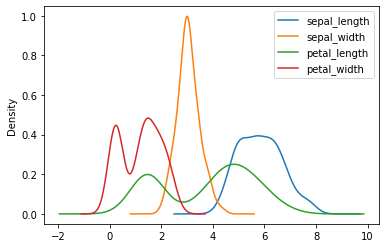

In [16]:
data.plot.kde()

<AxesSubplot:>

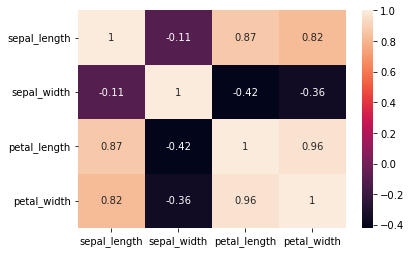

In [17]:
correlation = data.corr()
sns.heatmap(correlation, annot= True)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

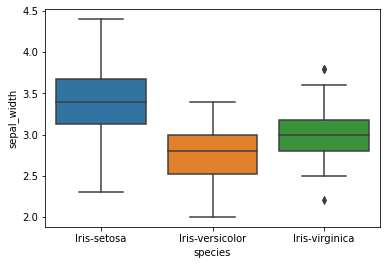

In [18]:
sns.boxplot(x = 'species', y = 'sepal_width', data = data)

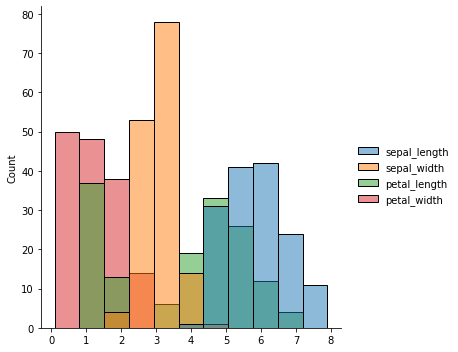

In [19]:
sns.displot(x)

<AxesSubplot:>

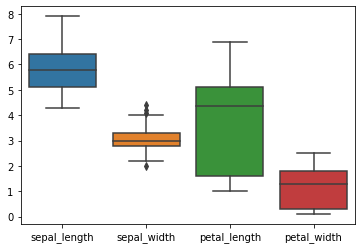

In [20]:
sns.boxplot(data = data)

# Machine Learning Algorithms

## K-Nearest-Neighbor

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 6, metric= 'minkowski', p = 2)

In [23]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test, y_test))

1.0


In [24]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [25]:
for i, k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)

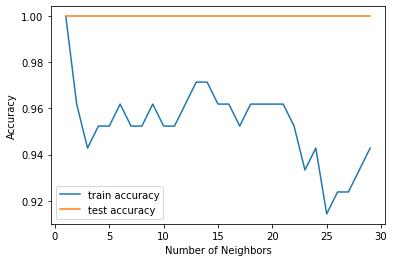

In [26]:
plt.plot(neighbors, train_accuracy, label = 'train accuracy')
plt.plot(neighbors, test_accuracy, label = 'test accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predict = dtc.predict(x_test)
metrics.accuracy_score(y_test, y_predict)

1.0

## K-means

In [28]:
from sklearn.cluster import KMeans
kmn = KMeans(n_clusters= 3)
kmn.fit(x)
labels = kmn.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
centroids = kmn.cluster_centers_

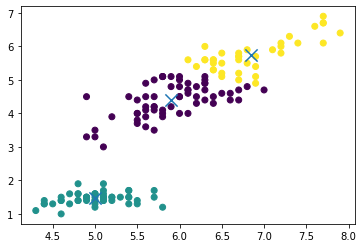

In [32]:
plt.scatter(x.iloc[:,0], x.iloc[:,2], c= labels)
plt.scatter(centroids[:,0], centroids[:,2], marker= 'x', s= 150)
plt.show()

In [34]:
inertia_list = []
for k in np.arange(1, 6):
    kmn = KMeans(n_clusters= k)
    kmn.fit(x)
    inertia_list.append(kmn.inertia_)
inertia_list    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034]

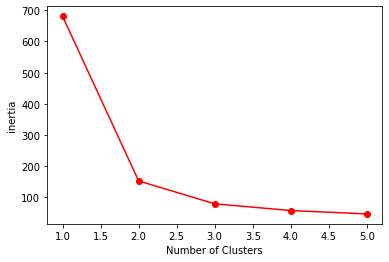

In [36]:
plt.plot(np.arange(1, 6), inertia_list, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

## Meanshift

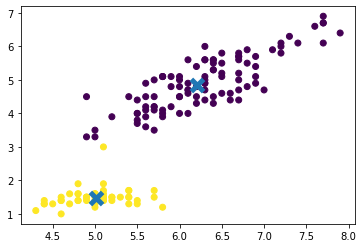

In [37]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(x)
label = ms.labels_
cluster_center = ms.cluster_centers_
plt.scatter(x.iloc[:,0], x.iloc[:,2], c=label)
plt.scatter(cluster_center[:,0], cluster_center[:,2], marker= 'x', s= 150, linewidths= 5)
plt.show()

## DBSCAN

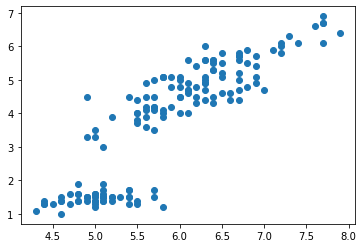

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.5, min_samples= 5)
dbscan.fit(x)
labels = dbscan.labels_
plt.scatter(x.iloc[:,0], x.iloc[:,2])
plt.show()

## SVM

In [45]:
from sklearn.svm import SVC
svclassifier = SVC(kernel= 'poly', degree= 8)
svclassifier.fit(x_train, y_train)
y_predicted = svclassifier.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

